In [1]:
from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Toggle Code"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def toggle_code():
    display(HTML(toggle_code_str))

C:\Users\rahul gupta\AppData\Local\Temp\ipykernel_13960\445671811.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Section - 2.1 Data Preprocessing

In the real world training data is hardly perfect it is usually not clean and it has got many issues such as `missing values` for certain features, features on `different scales non-numeric attributes` etc.

Often there is a need to pre-process the data to make it amenable for training the model.

> SKLearn provides a rich set of transformers for the job.

**The same preprocession should be applied to both training and test set**
This is for most cases create a problem if not taken care of.

> Sklearn provides **Pipeline** for making it easier to chain multiple transformers together and apply then uniformly across train,eval and test sets.

Once you get the training data, the first job is to explore the **data** and list down *preprocessing* needed.

#### Typical Problems include :
- `Missing Values` in dataset
- Numerical features are `not on the same scale`.
- `Categorical attibutes` need to be represented with sensible numerical representation
- `Too many features`, reduce them
- `Extract features` from non-numeric data.


**Sklearn provides a library of transormers for data preprocessing**
- There are set of transformers for data cleaning they come in the module sklearn.preprocessing and this sklearn.preprocessing module has facility for standardization missing value imputation, feature scaling etcetera. 
> Data Clearning (sklearn.preprocessing) 

- Then we have feature extractors sklearn feature_extraction module has bunch of feature extractors to extract features from different data types.
> Feature Extraction (sklearn.feature_extraction)

- Then we have feature reduction sklearn.decomposition module has got bunch of feature reduction algorithms implemented
> Feature reduction (sklearn.decomposition.pca)

- then there are then there are methods for feature expansion that we do especially in kernel methods.
> Feature Expansion (sklearn.kernel_approximation)

# **1. Feature Extraction**

`sklearn.feature_extraction` has useful APIs to extract features from data: 
1. DictVectorizer
2. FeatureHasher

## DictVectorizer

Many a times the data is present as a **list of dictionary objects**.  ML algorithms expect the data in **matrix form** with shape $(n, m)$ where $n$ is the number of samples and $m$ is the number of features.

`DictVectorizer` **converts** a *list of dictionary objects to feature matrix*.

Let's create a sample data for demo purpose containing `age` and `height` of children.

> Each record/sample is a dictionary with two keys `age` and `height`, and corresponding values.

In [2]:
 data = [{'age': 4, 'height':96.0},
        {'age': 1, 'height':73.9},
        {'age': 3, 'mass':88.9},
        {'age': 2, 'height':81.6}]

There are 4 data samples with 2 features each.

Let's make use of DictVectorizer to convert the list of dictionary objects to the feature matrix.

In [3]:
from sklearn.feature_extraction import DictVectorizer 
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ,  0. ],
       [ 1. , 73.9,  0. ],
       [ 3. ,  0. , 88.9],
       [ 2. , 81.6,  0. ]])

The transformed data is in a feature matrix form - 4 samples with 2 features each i.e. shape $(4, 2)$


## FeatureHasher

- FeatureHasher is a **high speed,low memory vectorizer** it uses **Feature Hashing technique**.
- So, here instead of building a hash table of features, as the vectorizers do, it **applies a hash function** to the features to **determine their column index** in the sample matrix directory. 
- This of course results in **increased speed and reduced memory usage** because now we are not building any kind of hash table, at the **expense of inspectability**; the hasher does not remember what the input features looked like and has **no inverse_transform** method

## Feature Extraction from images and text

* `sklearn.feature_extraction.image` has useful APIs to extract features from image data. 
<br>

* `sklearn.feature_extraction.text` has useful APIs to extract featurees from text data.

# **2. Data Cleaning**

### Handling missing values
- Missing values occur due to errors in data capture such as sensor malfunctioning, measurement errors etc
- Many ML algorithms cannot work with missing data, they need all features to be present
- **Discarding records** containing missing values would result in **loss of valuable training samples**
 
##### `sklearn.impute` API provides functionality to fill missing values in dataset.
1. SimpleImputer
2. KNNImputer
 


## SimpleImputer
Fills missing values in features

Some of its important parameters:


*    *missing_values:* Could be `int`, `float`, `str`, `np.nan` or `None`. Default is `np.nan`.

*    *strategy:* string, default is 'mean'.  One the following strategies can be used:

>*    ` mean` - missing values are replaced using the **mean** along each column
>*    ` median` - missing values are replaced using the **median** along each column
>*    `most_frequent` - missing values are replaced using the **most frequent** along each column
>*    `constant`  - missing values are replaced with value specified in  `fill_value` argument.

* `add_indicator` is a boolean parameter that when set to `True` returns **missing value indicators** in `indicator_` member variable.  

**Note**: 
- `mean` and `mode` strategies can only be used with numeric data. 
- `most_frequent` and `constant` strategies can be used with strings or numeric data.

In [4]:
import numpy as np

X = np.array([[7,1],[np.nan,8],[2,np.nan],[9,6]])
X

array([[ 7.,  1.],
       [nan,  8.],
       [ 2., nan],
       [ 9.,  6.]])

In [5]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy ='mean')
y = si.fit_transform(X)
y 

array([[7., 1.],
       [6., 8.],
       [2., 5.],
       [9., 6.]])

 So, the mean of that particular column has been imputed at the position containing `Nan value`

## KNNImputer

- Uses k-nearest neighbours approach to fill missing values in dataset
  * The missing value of an attribute in a specific example is filled with the mean value of the same attribute of `n-neighbours` *closest neighbours*
- The nearest neighbours are decided based on **Euclidean distance**

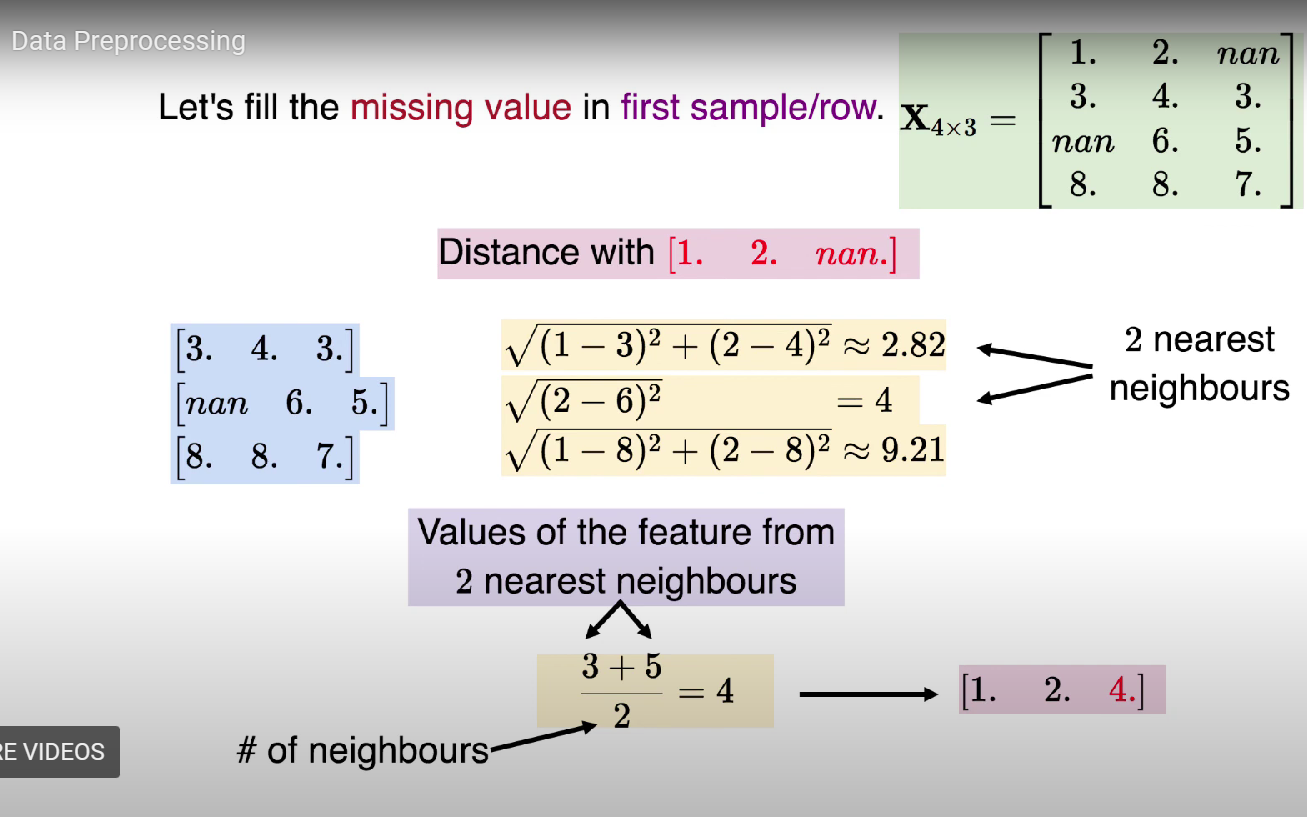

**In this way we can fill up the missing values with KNNimputer**

In [6]:
x = np.array([[1,2,np.nan],[3,4,3],[np.nan,6,5],[8,8,7]])
from sklearn.impute import KNNImputer
?KNNImputer
knni = KNNImputer(n_neighbors= 2, weights = 'uniform')
knni.fit_transform(x)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

  ### Marking Imputed values
  
  - it is useful to indicate the `presence of missing values in the dataset`
  
  - **MissingIndicator** helps us get those indications.
    * it returns a **binary matrix**,
      - True values corresponds to missing entries in original dataset

# Section - 2.2 Numeric Transformers

They are applied on numerical features:
1. Feature Scaling
2. Polynomial transformation
3. Discretization

### Feature scaling

**Numerical features with different scales** leads to `slower convergence` of iterative optimization procedures.

It is a good practice to scale numerical features so that all of them are on the same scale.

Let's learn how to scale numerical features with sklearn API.

Three feature scaling APIs are available in sklearn

- StandardScaler 
- MaxAbsScaler
- MinMaxScaler


### StandardScalar

Standardization is another feature scaling technique that results into (close to) zero mean and unit standard deviation of a feature's values.

Formula for standardization:

$$X_{new} = \dfrac{X_{old}- \mu}{\sigma}$$

Here, $\mu$ and $\sigma$ respectively are the mean and standard deviation of the feature values.

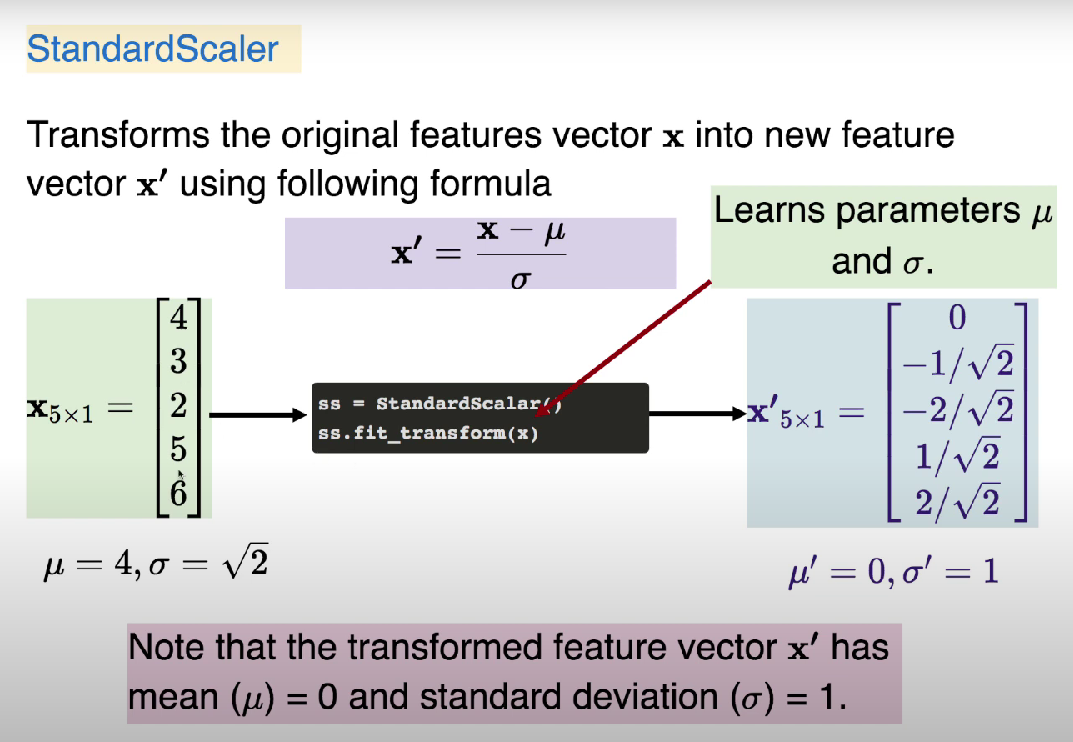

The feature variability can be better visualized in a combined histogram.

In [7]:
X = np.array([4,3,2,5,6])

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardized = ss.fit_transform(X.reshape(-1,1))
X_standardized[:5]

array([[ 0.        ],
       [-0.70710678],
       [-1.41421356],
       [ 0.70710678],
       [ 1.41421356]])

### MixMaxScalar

Normalization is a procedure in which the features' values are scaled such that they range between 0 and 1. This technique is also called **min-max scaling**.  It is performed with the following formula:
$$X_{new} = \dfrac{X_{old} - X_{min}}{X_{max}-X_{min}}$$

where 
* $X_{old}$ is the old value of a data point, which is rescaled to $X_{new}$. 
* $X_{min}$ is minimum value of feature $X$.
* $X_{max}$, is maximum value of feature $X$.

In [9]:
X= np.array([15, 2, 5, -2, -5]).reshape(-1,1)
print(X)

[[15]
 [ 2]
 [ 5]
 [-2]
 [-5]]


In [10]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_normalized = mm.fit_transform(X)
X_normalized[:5]

array([[1.  ],
       [0.35],
       [0.5 ],
       [0.15],
       [0.  ]])

### MaxAbsoluteScalar

It transforms the original features vector $\mathbf{x}$ into new feature vector $\mathbf{x'}$ so that all values fall within  range $[-1,\ 1]$

$$\mathbf{x'} = \dfrac{\mathbf{x}}{\text{MaxAbsoluteValue}}$$

where $\text{MaxAbsoluteValue} = \text{max}(\mathbf{x}.max, |\mathbf{x}.min|)$ 

In [11]:
x= np.array([4, 2, 5, -2, -100]).reshape(-1,1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


`here MaxAbsoluteValue = max(5,|-100|) = 100`

In [12]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


### FunctionTransformer

Constructs transformed features by applying a user defined function.

Enables conversion of an existing Python function into a transformer to assist in data cleaning or processing.

Useful when:
1. The dataset consists of *heterogeneous data types* (e.g. raster images and text captions),

2. The dataset is stored in a `pandas.DataFrame` and different columns require *different processing pipelines*.

3. We need stateless transformations such as taking the log of frequencies, custom scaling, etc.

In [13]:
x =np.array(
    [[128, 2 ],
    [4, 64],
    [256, 8 ],
    [1024, 32]])

from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.log2)
ft.fit_transform(x)

array([[ 7.,  1.],
       [ 2.,  6.],
       [ 8.,  3.],
       [10.,  5.]])

### Polynomial Transformation

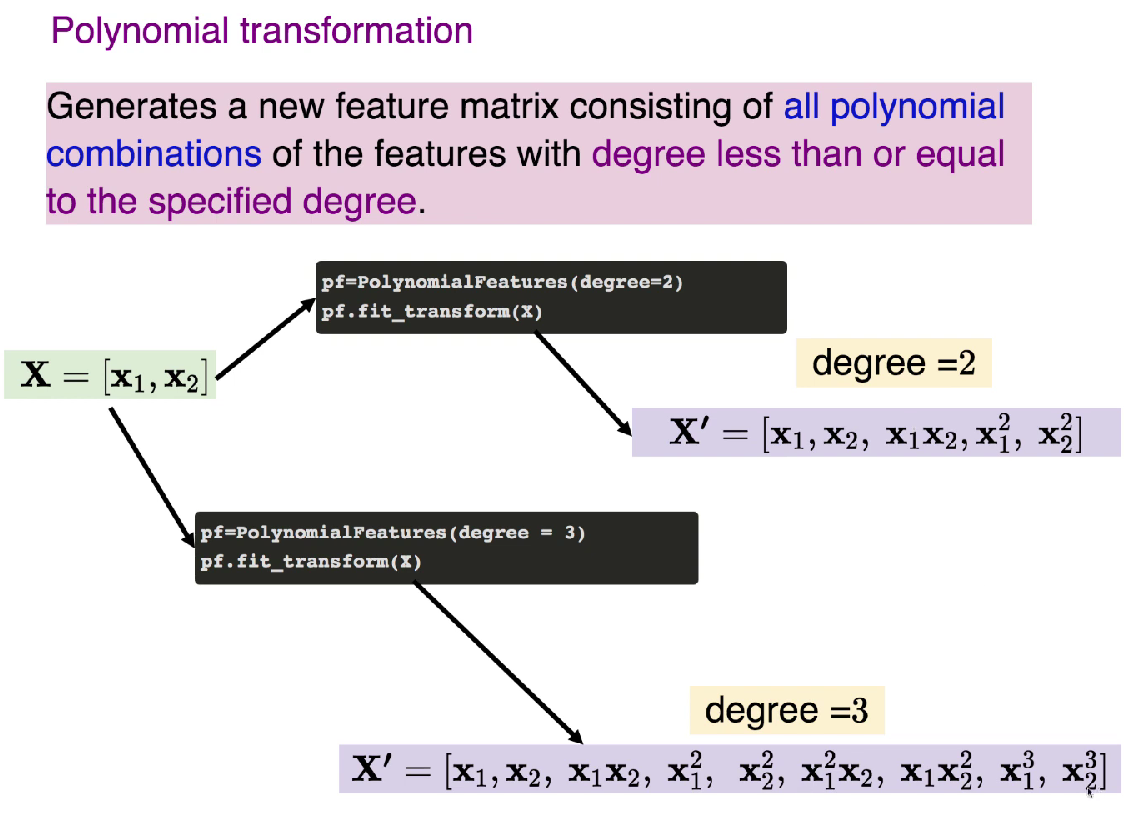

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'], axis=1)

print('Number of features before transformation = ', wine_data.shape)

#print(wine_data.head())

# Let us fit a polynomial of degree 2 to wine_data

poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print('Number of featueres after transformation = ', poly_wine_data.shape)

Number of features before transformation =  (1599, 11)
Number of featueres after transformation =  (1599, 78)


## Discretization - It refers to transformation of continuous features into Bins/Discrete values.

 ### KbinsDiscretizer
 
 - `Divides` a continuous variable into bins
 - `One hot encoding/Ordinal Encoding` is further appied to the bins labels
 

In [14]:
x = np.array([0,0.125,0.25,0.375,0.5,0.675,0.75,0.875,1]).reshape(-1,1)
x

array([[0.   ],
       [0.125],
       [0.25 ],
       [0.375],
       [0.5  ],
       [0.675],
       [0.75 ],
       [0.875],
       [1.   ]])

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

kbin = KBinsDiscretizer(n_bins = 5, strategy='uniform', encode = 'ordinal')
xbin = kbin.fit_transform(x)
xbin

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],
       [4.],
       [4.]])

In [16]:
kbin = KBinsDiscretizer(n_bins = 5, strategy='uniform', encode = 'onehot')
xbin = kbin.fit_transform(x)
xbin.toarray()

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

# Section - 2.3 Categorical Transformers

1. Feature encoding
2. Label encoding


### **Ordinal Encoding**

Categorical features are those that contain categories or groups such as education level, state etc as their data. These are non-numerical features and need to be converted into appropriate form before they feeding them for training an ML model. 

One intuitive way of handling them could be to assign them a numerical value. As an example, take state as a feature with 'Punjab', 'Rajasthan' and 'Haryana' as the possible values. We might consider assigning numbers to these values as follows:


$$
\begin{array}{c|c}
Old~feature & New~feature \\
\hline
\text{Punjab}&\text{1}\\
\hline
\text{Rajasthan}&\text{2}\\
\hline
\text{Haryana}&\text{3}\\
\end{array}
$$

However, this approach assigns some ordering to the labels, i.e., states, thus representing that Haryana is thrice Punjab and Rajasthan is twice Punjab, these relationships do not exist in the data, thus providing wrong information to the ML model.

One of the most-common approaches to handle this is: *One-hot encoding*. 

## **One-hot Encoding**

This approach consists of creating an additional feature for each label present in the categorical feature (i.e., the number of different states here) and putting a 1 or 0 for these new features depending on the categorical feature's value. That is,

$$
\begin{array}{c|c}
Old~feature & New~feature_1 (Punjab) & New~feature_2 (Rajasthan)&New~feature_3 (Haryana)\\
\hline
\text{Punjab}&\text{1}&0&0\\
\hline
\text{Rajasthan}&\text{0}&1&0\\
\hline
\text{Haryana}&\text{0}&0&1\\
\end{array}
$$


It may be implemented using `OneHotEncoder` class from `sklearn.preprocessing` module.  Let's demonstrate this concept with `Iris` dataset.

In [31]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

[**Iris dataset**](https://archive.ics.uci.edu/ml/datasets/iris) has the following features:

```
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, Iris Virginica
```

In [32]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width','label'] 
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The `label` is a categorical attribute.

In [33]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

`There are three class labels.  Let's convert them to one hot vectors.`

In [36]:
onehotencoder = OneHotEncoder(categories='auto')
print('Shape of y before encoding', iris_data.label.shape)

'''
Passing 1d arrays as data to onehotencoder is deprecated in version , 
hence reshape to (-1,1)  to have two dimensions. 
Input of onehotencoder fit_transform must not be 1-rank array 
'''
iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))

# y.reshape(-1,1) is a 450x1 sparse matrix of type '<class 'numpy.float64'>' 
# with 150 stored elements in Coordinate format.
# y is a 150x3 sparse matrix of type '<class 'numpy.float64'>' with 150 stored 
# elements in compressed sparse row format.
print('Shape of y after encoding', iris_labels.shape)

# since output is sparse use to_array() to expand it.
print ("\n First 5 labels:")
print(iris_labels.toarray()[:5])
print ("\n Last 5 labels:")
print(iris_labels.toarray()[-1:-5:-1])


Shape of y before encoding (150,)
Shape of y after encoding (150, 3)

 First 5 labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

 Last 5 labels:
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


Let us observe the difference between one hot encoding and ordinal encoding.

In [37]:
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1, 1))
print ("Unique labels:", np.unique(iris_labels_transformed))

print ("\nFirst 5 labels:")
print (iris_labels_transformed[:5])

Unique labels: [0. 1. 2.]

First 5 labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## **LabelEncoder**

Another option is to use `LabelEncoder` for transforming categorical features into integer codes.

In [38]:
from sklearn.preprocessing import LabelEncoder

In [258]:
# get the class column in a new variable
iris_labels = np.array(iris_data['label'])

# encode the class names to integers
enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Remember that the difference between LabelEncoder() and OrdinalEncoder() is that Ordinal supports 2D arrays or more than one feature column input whereas label encoder only supports 1D array or 1 feature column as input**

## LabelBinarizer

Several regression and binary classification can be extended to multi-class setup in `one-vs-all` fashion.

**This involves training a single regressor or classifier per class.**

For this, we need to **convert multi-class labels to binary labels, and LabelBinarizer performs this task.

In [260]:
y = np.array([1,2,6,1,8,6])
print(y)

print('Unique values in y are: ',np.unique(y),'\n'
     ,"No of unique values are: ",np.unique(y).itemsize,f', So {np.unique(y).itemsize} columns  will be created')

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
A = lb.fit_transform(y)
A

[1 2 6 1 8 6]
Unique values in y are:  [1 2 6 8] 
 No of unique values are:  4 , So 4 columns  will be created


array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

*If estimator supports `multiclass data`, **LabelBinarizer** is not needed *

## **MultilabelBinarizer**

Encodes categorical features with value between 0 and $k -1$, where $k$ is number of classes.

In [17]:
movie_genres =[{'action', 'comedy' },
               {'comedy'},
               {'action', 'thriller'},
               {'science-fiction', 'action', 'thriller'}]

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)


array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

## add_dummy_feature

Augments dataset with a column vector, each value in the column vector is $1$. This is useful for adding a parameter for bias term in the model.

In [19]:
x = np.array(
    [[7, 1 ],
    [1, 8 ],
    [2, 0 ],
    [9, 6 ]])

from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)

print(x_new)


[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


## Feature Selection

`sklearn.feature_selection` module has useful APIs to select features/ reduce dimensionality, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

+ Sometimes in a real world dataset, all features do not contribute well enough towards fitting a model.

+ The features that do not contribute significantly, can be removed. It leads to decrease in size of the dataset and hence, the computation cost of fitting a model.

* `sklearn.feature_selection` provides many APIs to accomplish this task.

#### Filter Based models: 
- VarianceThreshold 
- SelectKBest 
- SelectPercentile 
- GenericUnivariateSelect 

#### Wrapper Based models :
- RFE
- RFECV 
- SelectFromModel
- SequentialFeatureSelector

Note: Tree based and kernel based feature selection algorithrm will be covered in later weeks.

## Filter based methods

### VarianceThreshold

This transformer helps to keep only high variance features by providing a certain threshold. 

> Features with variance greater or equal to threshold value are kept rest are removed. 

> By default it removes any feature with same value i.e. 0 variance.

In [160]:
data = [{'age': 4, 'height':96.0},
        {'age': 1, 'height':73.9},
        {'age': 3, 'height':88.9},
        {'age': 2, 'height':81.6}]

In [161]:
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed, axis = 0)

array([ 1.25 , 67.735])

In [21]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = 9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ,  0. ],
       [73.9,  0. ],
       [ 0. , 88.9],
       [81.6,  0. ]])

`As you may observe from output of above cell, the transformer has removed the `age` feature because its variance is below the threshold.`

## Univariate feature selection 

It selects features based on univariate statistical tests.

1. Selectkbest
2. selectpercentile
3. GenericUnivariateSelect
4. SelectFpr (selects features based on False Positive Rate test)
5. SelectFdr (selects features based on on estimated false discovery rate.)
6. SelectFwe (selects features based on family-wise error rate.)

Also we have some sort of scoring methods to determine features or we call them as **Univariate scoring functions**.
- each API need a scoring func to score each feature wrt label
- 3 classes of scoring functions are : 
	1. Mutual information (MI) : measures dependency between 2 variables,it returns +ve value for dependent variables and 0 for independent variables. Higher MI indicates higher dependency.
    	- `mutual_info_regression` used for regression problems
        - `mutual_info_classif` used for classsification problems 
	<br><br>
    2. Chi-Square : Computes chi-square stats b/w features and labels
    	- `chi2` used for classification problems
        <br><br>
    3. F-Statistics
    	- `f_regression` used for reg problems
    	- `f_classif` used for classification prob
        
`MI` and `F-statistics` can be used in both classification and regression problems whereas **chi2 can only be used in clasification problems**

### SelectKBest

It selects `k` highest scoring features based on a function and removes the rest of the features.

Lets take an example of California Housing dataset.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
# dowload data
X_california, y_california = fetch_california_housing(return_X_y=True)
# select a subset of data
X, y = X_california[:2000, :], y_california[:2000]
print(f'Shape of of feature matrix before feature selection:{X.shape}')

"""Let's select 3 most important features, since it is a regression problem, 
we can use only `mutual_info_regression` or `f_regression` scoring functions only."""

skb = SelectKBest(mutual_info_regression, k = 3)
X_new = skb.fit_transform(X,y)
print(f'Shape of of feature matrix after feature selection:{X_new.shape}')

Shape of of feature matrix before feature selection:(2000, 8)
Shape of of feature matrix after feature selection:(2000, 3)


##### As you can see from above output, the transformed data now only has top 3 features.

In [23]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

### SelectPercentile

This is very similar to `SelectKBest` from previous section, the only difference is, it selects top `percentile` of all features and drops the rest of the features.

Similar to `SelectKBest`, it also uses a scoring function to decide importance of features.

Let's use the california housing price dataset for this API.

In [24]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile = 30)
X_new = sp.fit_transform(X,y)
print(f'Shape of of feature matrix after feature selection:{X_new.shape}')

Shape of of feature matrix after feature selection:(2000, 3)


##### As you can see from above output, the transformed data now only has top 30 percentile of features, i.e. only 3 out of 8 features.

In [25]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

### GenericUnivariateSelect

It applies univariate feature selection with a certain strategy, which is passed to the API via `mode` parameter. The `mode` can take one of the following values: `percentile` (top percentage), `k_best` (top k), `fpr` (false positive rate), `fdr`(false discovery rate), `fwe` (family wise error rate).


If we want to accomplish the same objective as `SelectKBest`, we can use following code:

In [26]:
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression, mode ='k_best', param = 3)
X_new = gus.fit_transform(X,y)
print(f'Shape of of feature matrix before feature selection:{X.shape}')
print(f'Shape of of feature matrix after feature selection:{X_new.shape}')


Shape of of feature matrix before feature selection:(2000, 8)
Shape of of feature matrix after feature selection:(2000, 3)


In [27]:
gus.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

## Wrapper Based Methods

Unlike filter based methods, wrapper based methods use **"estimator class"** rather than a **scoring function**.

### Recursive Feature Elimination (RFE)

- Uses an estimator to recursively remove features.
	- Initially fits an estimator on all features.
* Obtains feature importance from the estimator and removes the least important feature.

* Repeats the process by removing features one by one, until desired number of features are obtained.

>+ Use `RFECV` if we do not want to specify the desired number of features in RFE .
>* It performs `RFE` in a cross-validation loop to find the optimal number of features.

In [28]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 4, step=1)
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target
selector = selector.fit(X, y)

# support_ attribute is a boolean array
# marking which features are selected
print(selector.support_)

# rank of each feature
# if it's value is '1', then it is selected
# features with rank 2 and onwards are ranked least.
print(f'Rank of each feature is : {selector.ranking_}')

print(selector.feature_names_in_)


[ True False False  True False False  True  True]
Rank of each feature is : [1 3 2 1 5 4 1 1]
['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']


> We can transform the existing feature array to transformed one !!

In [29]:
X_new = selector.transform(X)
print(f'Shape of of feature matrix after feature selection:{X_new.shape}')

Shape of of feature matrix after feature selection:(20640, 4)


### RFECV 

It performs in a similar manner, just don't provide input to `n_features_to_select` parameter



In [30]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFECV(estimator, step=1)
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target
selector = selector.fit(X, y)

# support_ attribute is a boolean array
# marking which features are selected
print(selector.support_)

# rank of each feature
# if it's value is '1', then it is selected
# features with rank 2 and onwards are ranked least.
print(f'Rank of each feature is : {selector.ranking_}')



[ True  True  True  True False False  True  True]
Rank of each feature is : [1 1 1 1 3 2 1 1]


### SelectFromModel
- Selects *desired number of important features*(as specified by **max_features** parameter) above a **certain level of feature importance** as obtained from the trained estimator.
<br>

- The feature importance is obtained via **coef_** and **feature_importances_** member variables of the estimator class.We can also use **importance_getter** callable from the trained estimator class.
<br>

- The feature importance threshold can be specified either *numerically or through string argument* based on building built-in heuristics such as `mean, median` and float multiples of these heuristics like `0.1*mean`.

In [31]:
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

#SelectFromModel
estimator = LinearRegression()
estimator.fit(X, y)

print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')

model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
print(f'Shape of of feature matrix after feature selection:{X_new.shape}')


Coefficients of features: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
Indices of top 3 features: [1 0 3]
Shape of of feature matrix after feature selection:(20640, 3)


C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Sequential feature selection

Performs feature selection by selecting or deselecting features one by one in a greedy manner.

>### Uses one of the two approaches

#### Forward selection
- Starting with a zero feature, it finds one feature that obtains the best cross validation score for an estimator when trained on that feature.
- Repeats the process by adding a new feature to the set of selected features.

#### Backward selection
- Starting with all features and removes least important features one by one following the idea of forward selection.


In [32]:
from sklearn.feature_selection import SequentialFeatureSelector

#Creating estimator object
estimator = LinearRegression()

#Applying method
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction = 'backward')
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False False  True  True]


##### The direction parameter controls whether forward or backward
SFS is used.
* In general, forward and backward selection do not yield equivalent results.
* Select the direction that is efficient for the required number of selected features:

> When we want to select 7 out of 10 features,
	Forward selection would need to perform 7 iterations.
	Backward selection would only need to perform 3.

Backward selection seems to be a reasonable choice here.


### Composite Transformer

sklearn.compose has useful classes and methods to apply transformation on subset of features and combine them:

>1. ColumnTransformer 
<br>
>2. TransformedTargetRegressor


### ColumnTransformer

> Takes input as **[(estimator_name , estimator_object , Feature_column/list of Feature_columns on which it needs to be applied on]**

> Example **ColumnTransformer([('num',transform_pipeline,[size,height,weight]),('Cat',OneHotEncoder(),category),])**

* It applies a set of transformers to columns of an array or `pandas.DataFrame`, concatenates the transformed outputs from different transformers into a single matrix.

* It is useful for transforming heterogenous data by applying different transformers to separate subsets of features.

* It combines different feature selection mechanisms and transformation into a single transformer object.


In [35]:
X = np.array([[20. ,  "female"],
       [11.2,  "male"],
       [15.6,  "female" ],
       [13. ,  "female" ],
       [18.6,  "male" ],
       [16.4, "female"]])

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
colt = ColumnTransformer(
[('agescalar',MaxAbsScaler(),[0]),
('genderencod',OneHotEncoder(),[1])],remainder = 'drop',verbose_feature_names_out = False)

x = colt.fit_transform(X)
x

array([[1.  , 1.  , 0.  ],
       [0.56, 0.  , 1.  ],
       [0.78, 1.  , 0.  ],
       [0.65, 1.  , 0.  ],
       [0.93, 0.  , 1.  ],
       [0.82, 1.  , 0.  ]])

### Transforming Target for Regression

TransformedTargetRegressor

* Transforms the `target variable y` before fitting a regression model.

* The predicted values are mapped back to the original space via an inverse transform.

* **TransformedTargetRegressor** takes **regressor** and **transformer** to be applied to the target variable as arguments.


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
tt = TransformedTargetRegressor(regressor=LinearRegression(),func=np.log,inverse_func=np.exp)

X = np.arange(4).reshape(-1,1)
Y = np.exp(2*X).ravel()
tt.fit(X,Y)


TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

## PCA (NOT NEED TO STUDY IN GREAT DETAIL RIGHT NOW)
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance.

It helps in reducing dimensions of a dataset, thus computational cost of next steps e.g. training a model, cross validation etc.

Lets generate some artificial data to better understand PCA:

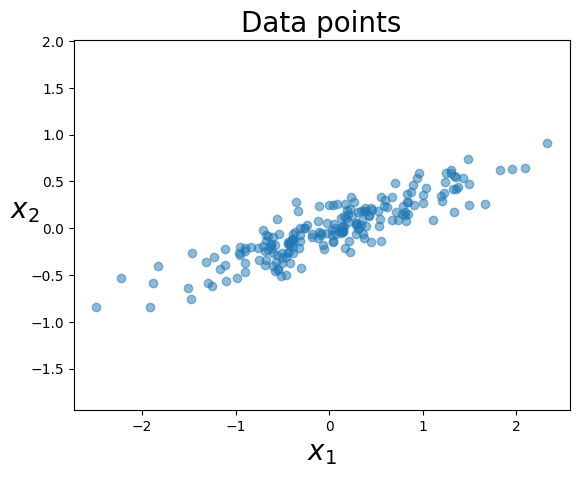

In [271]:
import matplotlib.pyplot as plt
#@title [Generate synthetic dataset]
rand = np.random.RandomState(1)
X = np.matmul(rand.rand(2, 2), rand.randn(2, 200)).T

"""The code provided creates a matrix X of shape (200, 2) by multiplying two matrices:

* rand.rand(2, 2) is a matrix of shape (2, 2) with random values between 0 and 1.
* rand.randn(2, 200) is a matrix of shape (2, 200) with random values from a normal distribution.
The .T operator transposes a matrix, so the resulting matrix X has shape (200, 2)."""

plt.figure()
plt.title('Data points', size = 20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal');
toggle_code()

Let us fit a PCA transformer on this data and compute its two principal components:

In [272]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Let's print the principal axes, they are two 2D vectors for this example. The PCA object returns them in the form of a matrix, where each column represents a principal component:

In [273]:
# Let's print the principal axes, they are two 2D vectors for this example.
# The PCA object returns them in the form of a matrix, where each column represents a principal component:
print(f'The {pca.n_components_} principal axes are\n', pca.components_,"\n")

# Let's also look at the explained variance corresponding to each principal axes.
print('Explained variance by each component', pca.explained_variance_,"\n")
      
print('Mean across x1 and x2 dimensions is: ', pca.mean_)      

The 2 principal axes are
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]] 

Explained variance by each component [0.7625315 0.0184779] 

Mean across x1 and x2 dimensions is:  [ 0.03351168 -0.00408072]


To better understand PCA, lets visualize these principal axes.

There are two principal axes  C1  and  C2 . They are orthogonal to each other. An additional vector  C3  is also mentioned for comparison.

The lengths of  C1  and  C2  are taken as square root of respective explanined variance. the length of the vector implies how important that vector is.

In [37]:
toggle_code()
    
#@title [Visualize principal components]
# set x and y labels
plt.figure()
plt.title('Data and candidate vectors', size = 20)
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

# plot data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_, 
                                    pca.components_, 
                                    ['$\mathbf{C_1}$','$\mathbf{C_2}$'],
                                    ['r','b']):
    v = principal_axis * np.sqrt(length)
    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis
    plt.quiver(*v0,*(v1-v0),scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis
    plt.text(*(3.4*v1), axis_name, size = 20)

# draw 3rd component
lengths = np.eye(2)
np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5,0.3]

plt.quiver(*pca.mean_,
           *(1.1*(c3-pca.mean_)),
           scale=1,
           scale_units='xy',
           color='grey')

# label the  principal axis
plt.text(*(1.4*c3), 
         '$\mathbf{C_3}$', 
         size = 20,
         color='grey')

plt.axis('equal')
plt.show()

# draw projections of data points on different vectors
projections = X@pca.components_
print(projections.shape)

arbitary_projection = X@c3
print(arbitary_projection.shape)


# plt.figure(figsize=(8,6))
plt.scatter(projections[:,0], 1+np.zeros((200,1)),  alpha = 0.3, color='r')
plt.scatter(projections[:,1], -1+np.zeros((200,1)),  alpha = 0.3, color='b')
plt.scatter(arbitary_projection,np.zeros((200,)),  alpha = 0.3, color='grey')
plt.legend(['$\mathbf{C_1}$', '$\mathbf{C_2}$','$\mathbf{C_3}$'], prop={'size' : 16})
plt.title("Variance covered by different vectors", size = 20)
plt.ylim([-1.5,1.5])
plt.axis('equal')
plt.grid(True)
plt.yticks([],[])
plt.xlabel('$z$', size = 20)
plt.show()

NameError: name 'plt' is not defined

We can use PCA to reduce number of dimensions of a dataset. The components that are least important i.e. their explained variance is low, are removed and only those components that capture high (i.e. desired) amount of variance are kept.

Let's reduce the dimension of our data from 2 to 1. You can observe the transformed data has only 1 feature.

In [275]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


To better understand what happend to our data, let's visualize our original data and the reduced data.

To do this, we will need to bring the transformed data into space of original data,
which can be accomplished by inverse_transform methond of PCA object.

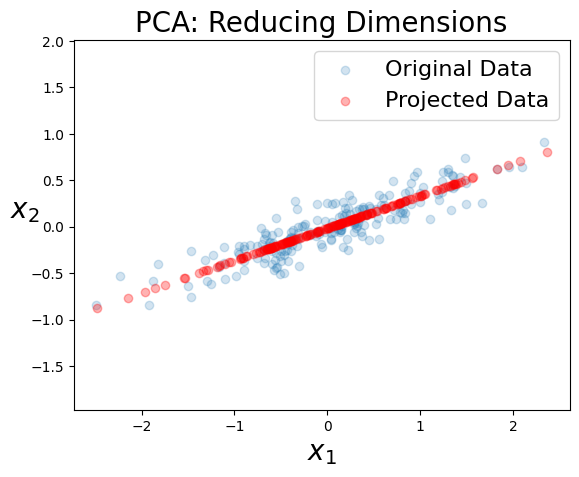

In [276]:
toggle_code()
#@title [Visualize data in PC space]
# inverse transform the reduced data
X_new = pca.inverse_transform(X_pca)

plt.figure()
plt.title('PCA: Reducing Dimensions', size = 20)
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation = 0)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.3, c='r')
plt.legend(['Original Data', 'Projected Data'], prop={'size' : 16})
plt.axis('equal')
plt.show()

### From above chart it is clear that the new/transformed data points are now projected on $\mathbf C_1$ vector. 

### Chaining Transformers

- The preprocessing transformations are applied one after another on the input feature matrix.

- It is important to apply exactly same transformation on training, evaluation and test set in the same order.

- Failing to do so would lead to incorrect predictions from model due to distribution shift and hence incorrect performance evaluation.

- The `sklearn.pipeline` module provides utilities to build a composite estimator, as a chain of transformers and estimators.

## Pipeline

1. Sequentially apply a list of transformers and estimators.

2. Intermediate steps of the pipeline must be 'transformer' i.e, they must implement fit and transform methods.

3. The final estimator only needs to implement fit.

**The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.**

### 1.Creating Pipelines

- A pipeline can be created with Pipeline() or make_pipeline().

- It takes a list of `('estimatorsName',estimator(...))` tuples. The pipeline object exposes interface of the last step.

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

estimators = [
    ('simpleImputer' , SimpleImputer()),
    ('standardScaler' , StandardScaler()),
]

pipe = Pipeline(steps=estimators)

#The same pipeline can also be created via make_pipeline() helper function,
#which doesn't take names of the steps and assigns them generic names based on their steps.

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(), StandardScaler())

### 2.Accessing Individual steps in a Pipeline

In [39]:
from sklearn.decomposition import PCA
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
]
pipe = Pipeline(steps=estimators)

#Let's print number of steps in this pipeline:

print(len(pipe.steps))

3


**Let's look at each of the steps:**

In [200]:
print(pipe.steps)

[('simpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]


**The second estimator can be accessed in following 4 ways:**

In [201]:
print(pipe.named_steps.regressor)

LinearRegression()


In [202]:
pipe.steps[1]

('pca', PCA())

In [203]:
pipe['pca']

PCA()

### 3.Accessing parameters of a step in pipeline
Parameters of the estimators in the pipeline can be accessed using the __syntax, note there are two underscores.

In [40]:
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
]

pipe = Pipeline(steps=estimators)
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

In above example n_components of PCA() step is set after the pipeline is created.

### 4.GridSeachCV with Pipeline

By using naming convention of nested parameters, grid search can be implemented.

In [41]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    imputer=['passthrough',SimpleImputer(),KNNImputer()],
    clf=[SVC(), LogisticRegression()],
    clf_C=[0.1, 1, 10, 100])

grid_search = GridSearchCV(pipe, param_grid=param_grid)

- c is an inverse of regularization, lower its value stronger the regularization is.

- In the example above clf_C provides a set of values for grid search.

### **Caching Transformers**

Transforming data is a computationally expensive step.
* For grid search, transformers need not be applied for every parameter configuration. 

* They can be applied only once, and the transformed data can be reused.

* This can be achived by setting `memory` parameter of `pipeline` object.


In [207]:
import tempfile 
tempDirPath = tempfile.TemporaryDirectory()

In [208]:
estimators = [
              ('simpleImputer', SimpleImputer()),
              ('pca', PCA(2)),
              ('regressor',LinearRegression())
]

pipe = Pipeline(steps = estimators ,memory = tempDirPath)

### **FeatureUnion** 
Concatenates results of multiple transformer objects.

* Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.

* `FeatuerUnion` and `Pipeline` can be used to create complex transformers.

### **5.Visualizing Pipelines**

In [214]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('selector', ColumnTransformer([(
        'select_first_4', 'passthrough', slice(0, 4))])),

    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

cat_pipeline = ColumnTransformer([
    ('label_binarizer', LabelBinarizer(), [4]),
])

full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline),
                                               ('cat_pipeline', cat_pipeline)
                                               ])


In [277]:
from sklearn import set_config
set_config(display='diagram')

#displays HTML representation in a jupyter context
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('scaler', StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

### Handling Imbalanced Data

Imbalanced datasets are those where one class is very less represented than the other class. This kind of data results in less efficient ML algorithm.

There are two main approaches to handle imbalanced data:
* Undersampling
* Oversampling

[Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)

![Image Source](https://miro.medium.com/max/1400/0*mOgypphrofDS9Z32.png)

We will demonstrate how to handle imbalance with the help of **wine quality dataset** that we have used earlier.

In [216]:
wine_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

wine_data.shape

(1599, 12)

In [218]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [219]:
wine_data.quality.value_counts(ascending=True)

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

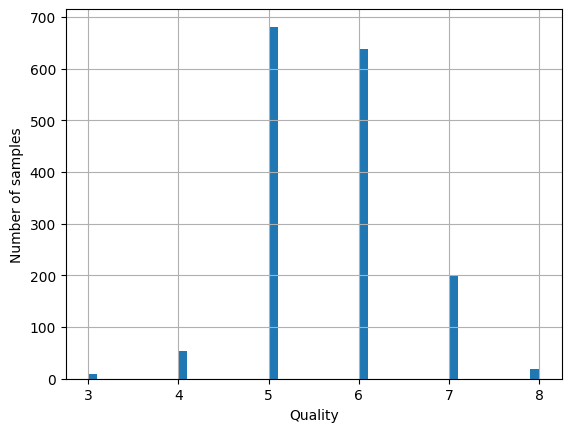

In [220]:
# display the histograms of the target variable 'quality'

wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

### **1. Undersampling**

Undersampling refers to sampling from the majority class in order to keep only a part of these data points.


It may be carried out using **RandomUnderSampler** class from **imblearn** library.

In [223]:
from imblearn.under_sampling import RandomUnderSampler

In [229]:
#class
class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()

# separate class
class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_3 = wine_data[wine_data['quality'] == 3]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]


# print the shape of the class
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)



class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)


In [225]:
# It allows you to count the items in an iterable list.
from collections import Counter

X = wine_data.drop(['quality'],axis=1)
y = wine_data['quality']

In [226]:
undersampler = RandomUnderSampler(random_state =0)
X_rus, y_rus = undersampler.fit_resample(X,y) 

print('Original dataset shape : ',y.shape)
print('Resampled dataset shape : ', y_rus.shape)

print()
print(Counter(y))
print(Counter(y_rus))


Original dataset shape :  (1599,)
Resampled dataset shape :  (60,)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


The class with the least number of samples is '3'. 

Hence all the other class samples are reduced to the number of samples in the least class.

### **2. Oversampling**

Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. 

This might consist of either replicating or generating synthetic data for the minority class.

It may be carried out using RandomOverSampler class from imblearn library.

In [230]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape : ', y.shape)
print('Resampled dataset shape : ', y_ros.shape)

print()
print(Counter(y))
print(Counter(y_ros))


Original dataset shape :  (1599,)
Resampled dataset shape :  (4086,)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [231]:
print('New random points generated with RandomOverSampler : ',X_ros.shape[0] - X.shape[0])

New random points generated with RandomOverSampler :  2487


The class with the majority number of samples is '5'. Hence all the other class samples that are lesser than this class count are newly sampled to the number of samples in the majority class.

#### **Oversampling using SMOTE**

SMOTE (Synthetic Minority Oversampling Technique) is a popular technique for over sampling. It is available under **imblean** library.


In [232]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE()
X_smote, y_smote = oversampler.fit_resample(X, y)

Counter(y_smote)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [233]:
print('New random points generated with SMOTE : ', X_ros.shape[0] - X.shape[0])

New random points generated with SMOTE :  2487


Types of SMOTE:

* Borderline SMOTE

* Borderline-SMOTE SVM

* Adaptive Synthetic Sampling(ADASYN)
